In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Kasen chitai,1961
1,Ser,2010
2,Devil Come to Hell and Stay Where You Belong,2008
3,Things You Don't Tell...,2006
4,Regret,2015


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [99]:
c_sup = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
q = c_sup.groupby(['year', 'character']).size()
z = q.unstack().fillna(0)

counter = 0
for i in z.index :
    if z.loc[i, 'Superman'] - z.loc[i, 'Batman'] > 0 :
        counter += 1

print(counter)

# see solutions for a more elegant way

11


### How many years have been "Batman years", with more Batman characters than Superman characters?

In [102]:
c_bat = cast[(cast.character == 'Superman') | (cast.character == 'Batman')]
a = c_bat.groupby(['year', 'character']).size()
b = a.unstack().fillna(0)

counter = 0
for i in b.index :
    if b.loc[i, 'Batman'] - b.loc[i, 'Superman'] > 0 :
        counter += 1

print(counter)

26


### Plot the number of actor roles each year and the number of actress roles each year over the history of film.

In [103]:
import matplotlib.pyplot as plt

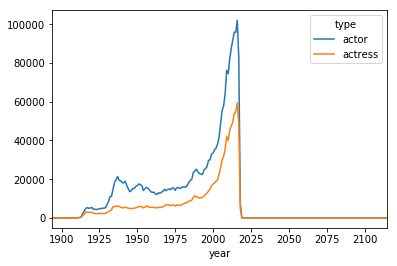

In [124]:
c_act = cast
e = c_act.groupby(['year', 'type']).size()
f = e.unstack().fillna(0)
f.plot()

### Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

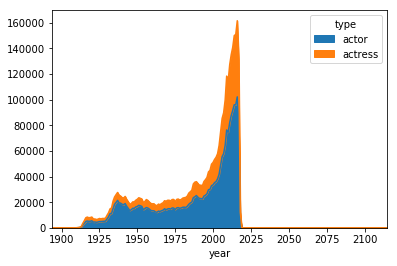

In [125]:
c_act = cast
e = c_act.groupby(['year', 'type']).size()
f = e.unstack().fillna(0)
f.plot(kind='area')

### Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

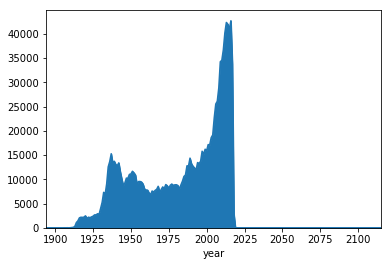

In [168]:
c_act2 = cast
g = c_act2.groupby(['year', 'type']).size()
h = g.unstack().fillna(0)
h['difference'] = h.actor - h.actress
h.difference.plot(kind='area')

### Plot the fraction of roles that have been 'actor' roles each year in the hitsory of film.

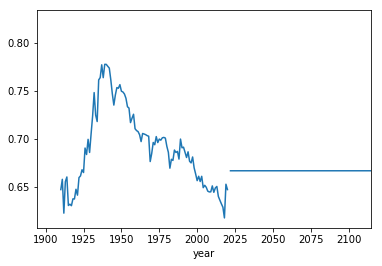

In [173]:
c_act2 = cast
g = c_act2.groupby(['year', 'type']).size()
h = g.unstack()#.fillna(0)
h['fraction'] = h.actor / (h.actor + h.actress)
h.fraction.plot()#ylim=[0, 1])

### Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

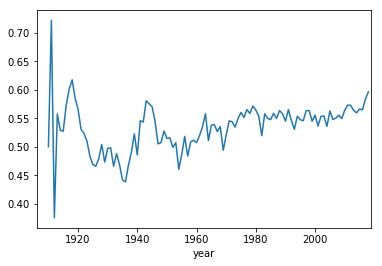

In [181]:
c_act3 = cast[cast.n == 2]
g = c_act3.groupby(['year', 'type']).size()
h = g.unstack()#.fillna(0)
h['fraction'] = h.actor / (h.actor + h.actress)
h.fraction.plot()

### Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

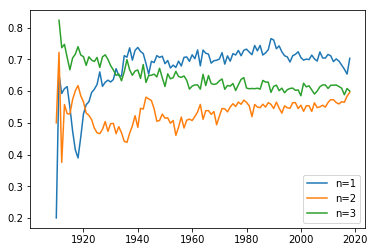

In [197]:
c_act4 = cast[cast.n == 1]
c_act5 = cast[cast.n == 2]
c_act6 = cast[cast.n == 3]

g1 = c_act4.groupby(['year', 'type']).size()
g2 = c_act5.groupby(['year', 'type']).size()
g3 = c_act6.groupby(['year', 'type']).size()

h1 = g1.unstack()
h2 = g2.unstack()
h3 = g3.unstack()

h1['frac'] = h1.actor / (h1.actor + h1.actress)
h2['frac'] = h2.actor / (h2.actor + h2.actress)
h3['frac'] = h3.actor / (h3.actor + h3.actress)

plt.plot(h1['frac'])
plt.plot(h2['frac'])
plt.plot(h3['frac'])
plt.legend(['n=1', 'n=2', 'n=3'])

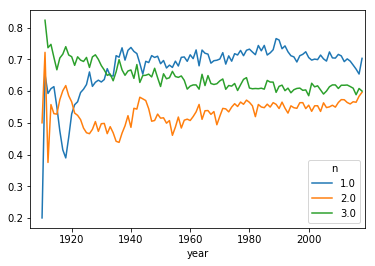

In [8]:
c = cast[cast.n <= 3]
j = c.groupby(['year', 'type', 'n']).size()
k = j.unstack(1)
(k.actor / (k.actor + k.actress)).unstack().plot()

In [13]:
c = cast
c = c[(c.character == 'Kermit the Frog') | (c.character == 'Oscar the Grouch')]
g = c.groupby(['character', c.year // 10 * 10]).size()
g

character         year
Kermit the Frog   1970    1
                  1980    4
                  1990    2
                  2000    1
                  2010    1
Oscar the Grouch  1980    2
                  1990    1
                  2000    1
dtype: int64

In [44]:
u = g.unstack(0).fillna(0)
u

character,Kermit the Frog,Oscar the Grouch
year,,
1970,1.0,0.0
1980,4.0,2.0
1990,2.0,1.0
2000,1.0,1.0
2010,1.0,0.0


In [45]:
u['Kermit the Frog'] - u['Oscar the Grouch']

year
1970    1.0
1980    2.0
1990    1.0
2000    0.0
2010    1.0
dtype: float64

In [47]:
z = u.stack()
z

year  character       
1970  Kermit the Frog     1.0
      Oscar the Grouch    0.0
1980  Kermit the Frog     4.0
      Oscar the Grouch    2.0
1990  Kermit the Frog     2.0
      Oscar the Grouch    1.0
2000  Kermit the Frog     1.0
      Oscar the Grouch    1.0
2010  Kermit the Frog     1.0
      Oscar the Grouch    0.0
dtype: float64

In [58]:
df = g.unstack('character')
df['extra'] = 1
df = df.set_index('extra', drop=True, append=True)
df.unstack(0)

character Kermit the Frog                     Oscar the Grouch                 \
year                 1970 1980 1990 2000 2010             1970 1980 1990 2000   
extra                                                                           
1                     1.0  4.0  2.0  1.0  1.0              NaN  2.0  1.0  1.0   

character       
year      2010  
extra           
1          NaN